In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data/Pregnancy-During-the-COVID-19-Pandemic.csv')

In [4]:
df.head()

,OSF_ID,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Language,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
0,1,38.3,"$200,000+",Masters degree,9.0,13.0,39.71,Dec2020,49.20,3431.0,Vaginally,No,English,2,3,27
1,2,34.6,"$200,000+",Undergraduate degree,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,English,2,33,92
2,3,34.3,"$100,000 -$124,999",Undergraduate degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,French,,,
3,4,28.8,"$100,000 -$124,999",Masters degree,9.0,20.0,38.57,Dec2020,41.00,2534.0,Vaginally,No,French,53,67,54
4,5,36.5,"$40,000-$69,999",Undergraduate degree,14.0,20.0,39.86,Oct2020,53.34,3714.0,Caesarean-section (c-section),No,English,23,32,71


In [3]:
df.shape # qtd de linhas e colunas

(10772, 16)

In [43]:
# dropa colunas desnecessárias
df.drop(columns = ["OSF_ID","Language"], inplace = True)
df.head()

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
0,38.3,"$200,000+",Masters degree,9.0,13.0,39.71,Dec2020,49.20,3431.0,Vaginally,No,2,3,27
1,34.6,"$200,000+",Undergraduate degree,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,2,33,92
2,34.3,"$100,000 -$124,999",Undergraduate degree,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,,
3,28.8,"$100,000 -$124,999",Masters degree,9.0,20.0,38.57,Dec2020,41.00,2534.0,Vaginally,No,53,67,54
4,36.5,"$40,000-$69,999",Undergraduate degree,14.0,20.0,39.86,Oct2020,53.34,3714.0,Caesarean-section (c-section),No,23,32,71


In [44]:
# substituindo espaços em branco por "NaN" (nulo), para interpretação correta
df.replace(" ", np.nan, inplace=True)

In [45]:
# checar existência de linhas duplicadas
# o duplicated() considera duplicação a repetição de valores de uma linha inteira (todas as colunas)
# importante lembrar que se linhas possuem valores null nas mesmas colunas elas tbm são consideradas duplicatas
df.duplicated().sum()

np.int64(43)

In [46]:
# calcula a % de valores nulos que cada coluna possui
df.isnull().mean()*100

Maternal_Age                                   1.030449
Household_Income                               2.330115
Maternal_Education                             1.643149
Edinburgh_Postnatal_Depression_Scale          10.898626
PROMIS_Anxiety                                11.195693
Gestational_Age_At_Birth                      37.486075
Delivery_Date(converted to month and year)    37.495358
Birth_Length                                  49.127367
Birth_Weight                                  43.575938
Delivery_Mode                                 48.598218
NICU_Stay                                     48.626068
Threaten_Life                                  8.317861
Threaten_Baby_Danger                           8.392128
Threaten_Baby_Harm                             8.280728
dtype: float64

In [47]:
# mostra a qtd de colunas com valores null em cada linha
null_count = df.isnull().sum(axis=1)
print(null_count)

0         0
1         6
2        11
3         0
4         0
         ..
10767     6
10768    11
10769     6
10770     6
10771     3
Length: 10772, dtype: int64


In [48]:
# removendo linhas com +10 valores nulos 
df = df[null_count <= 10]
df.shape

(10245, 14)

In [49]:
# por serem colunas importantes, as linhas que possuem valores nulos nas colunas Edinburgh_Postnatal_Depression_Scale,
# PROMIS_Anxiety, Threaten_Life, Threaten_Baby_Danger e Threaten_Baby_Harm serão dropadas ao invés de terem seu valor substituído
# por alguma medida de tendência central (como moda, média e mediana) pois seriam valores "falsos", gerados artificialmente.
# Essa decisão foi tomada pois as colunas citadas têm porcentagens consideradas baixas para presença de valores nulos como foi
# mostrado (11.19%, 8.31%, 8.39% e 8.28% respectivamente)

df = df.dropna(subset=['Threaten_Life', 'Threaten_Baby_Danger', 'Threaten_Baby_Harm', 'PROMIS_Anxiety', 'Edinburgh_Postnatal_Depression_Scale'])

In [50]:
df.shape

(9566, 14)

In [51]:
# inexistência de valores duplicados
df.duplicated().sum()

np.int64(0)

In [77]:
# converter Delivery_Date pra datetime
df['Delivery_Date'] = pd.to_datetime(df['Delivery_Date'], format='%b%Y')
str(df.dtypes['Delivery_Date'])
df['Delivery_Date'].head(10)

0    2020-12-01
1           NaT
3    2020-12-01
4    2020-10-01
5    2020-06-01
6           NaT
8    2020-11-01
10          NaT
13   2020-10-01
14   2021-03-01
Name: Delivery_Date, dtype: datetime64[ns]

<Axes: ylabel='Frequency'>

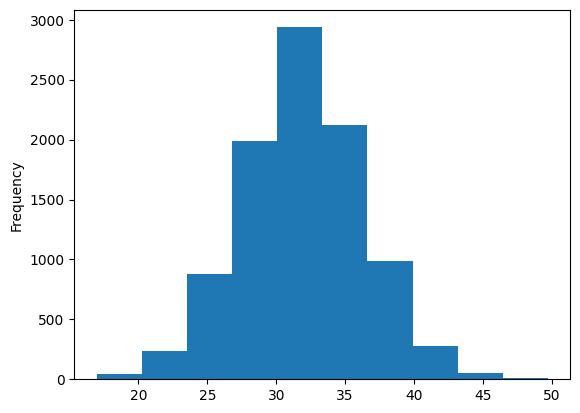

In [52]:
# checando se existem outliers em Maternal_Age
df["Maternal_Age"].plot.hist()

In [82]:
# substituindo valores nulos pela média
# foi decidido substituir porque a porcentagem de NaNs é baixíssima e não é vantajoso excluir
# linhas onde Maternal_Age é nula
df["Maternal_Age"].fillna(df["Maternal_Age"].mean(), inplace=True)
df["Maternal_Age"].isnull().mean()*100 # 0% de valores nulos

np.float64(0.0)

In [64]:
# convertendo valores de Maternal_Age para inteiro (arredondamento)
df["Maternal_Age"] = df["Maternal_Age"].round().astype(int)
df.head()

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
0,38,9,5,9.0,13.0,39.71,Dec2020,49.20,3431.0,Vaginally,No,2,3,27
1,35,9,4,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,2,33,92
3,29,5,5,9.0,20.0,38.57,Dec2020,41.00,2534.0,Vaginally,No,53,67,54
4,36,3,4,14.0,20.0,39.86,Oct2020,53.34,3714.0,Caesarean-section (c-section),No,23,32,71
5,38,7,4,3.0,8.0,38.57,Jun2020,NaN,NaN,NaN,NaN,29,36,33


In [54]:
# ver quais são os valores únicos de Household_Income
df["Household_Income"].unique()

array(['$200,000+', '$100,000 -$124,999', '$40,000-$69,999',
       '$150,000 - $174,999', '$70,000-$99,999', '$175,000- $199,999',
       '$125,000- $149,999', '$20,000- $39,999', 'Less than $20, 000',
       nan], dtype=object)

In [55]:
# ver quais são os valores únicos de Maternal_Education
df["Maternal_Education"].unique()

array(['Masters degree', 'Undergraduate degree', 'High school diploma',
       'College/trade school', 'Less than high school diploma',
       'Doctoral Degree', nan], dtype=object)

In [57]:
# precisamos fazer ENCODING em algumas features para que possam ser interpretadas corretamente pelos modelos.
# serão feitos one-hot encoding nas colunas NICU_Stay e Delivery_Mode, assim não corre o risco de seus valores serem interpretados
# do jeito errado (por exemplo criando distâncias inexistentes entre certos valores, mantendo a equidistância entre eles).
# Label Encoding será feito nas colunas Household_Income e Maternal_Education

# substituindo NaNs por unknown em Household_Income
df['Household_Income'] = df['Household_Income'].fillna('Unknown')
df['Household_Income'].unique()

array(['$200,000+', '$100,000 -$124,999', '$40,000-$69,999',
       '$150,000 - $174,999', '$70,000-$99,999', '$175,000- $199,999',
       '$125,000- $149,999', '$20,000- $39,999', 'Less than $20, 000',
       'Unknown'], dtype=object)

In [60]:
# dicionário de levels
household_level = {
    'Unknown': 0,
    'Less than $20, 000': 1,
    '$20,000- $39,999': 2,
    '$40,000-$69,999': 3,
    '$70,000-$99,999': 4,
    '$100,000 -$124,999': 5,
    '$125,000- $149,999': 6,
    '$150,000 - $174,999': 7,
    '$175,000- $199,999': 8,
    '$200,000+': 9,
}

# substituindo valores pelos levels
df['Household_Income'] = df['Household_Income'].replace(household_level).infer_objects(copy=False).astype(int)
df['Household_Income'].head(10)

0     9
1     9
3     5
4     3
5     7
6     9
8     5
10    4
13    4
14    9
Name: Household_Income, dtype: int64

In [61]:
# substituindo NaNs por unknown em Maternal_Education
df["Maternal_Education"] = df["Maternal_Education"].fillna("Unknown")
df["Maternal_Education"].unique()

array(['Masters degree', 'Undergraduate degree', 'High school diploma',
       'College/trade school', 'Less than high school diploma',
       'Doctoral Degree', 'Unknown'], dtype=object)

In [62]:
# dicionário de levels
education_level = {
    'Unknown': 0,
    'Less than high school diploma': 1,
    'High school diploma': 2,
    'College/trade school': 3,
    'Undergraduate degree': 4,
    'Masters degree': 5,
    'Doctoral Degree': 6,
}

# substituindo valores pelos levels
df["Maternal_Education"] = df["Maternal_Education"].replace(education_level).infer_objects(copy=False).astype(int)
df["Maternal_Education"].head(10)

C:\Users\Paloma\AppData\Local\Temp\ipykernel_22212\2029550412.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Maternal_Education"] = df["Maternal_Education"].replace(education_level).infer_objects(copy=False).astype(int)


0     5
1     4
3     5
4     4
5     4
6     2
8     3
10    1
13    5
14    6
Name: Maternal_Education, dtype: int64

In [63]:
# visualizar dados
df.head(10)

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,NICU_Stay,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm
0,38.3,9,5,9.0,13.0,39.71,Dec2020,49.20,3431.0,Vaginally,No,2,3,27
1,34.6,9,4,4.0,17.0,NaN,NaN,NaN,NaN,NaN,NaN,2,33,92
3,28.8,5,5,9.0,20.0,38.57,Dec2020,41.00,2534.0,Vaginally,No,53,67,54
4,36.5,3,4,14.0,20.0,39.86,Oct2020,53.34,3714.0,Caesarean-section (c-section),No,23,32,71
5,38.3,7,4,3.0,8.0,38.57,Jun2020,NaN,NaN,NaN,NaN,29,36,33
6,34.5,9,2,8.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,24,30,32
8,33.1,5,3,1.0,7.0,40.86,Nov2020,55.88,4480.0,Vaginally,No,27,76,72
10,28.6,4,1,20.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,0,50,98
13,29.2,4,5,14.0,17.0,41.00,Oct2020,47.00,3084.0,Vaginally,No,68,69,81
14,31.8,9,6,3.0,14.0,30.29,Mar2021,32.00,1050.0,Caesarean-section (c-section),Yes,30,30,50


In [65]:
# one-hot encoding

# NICU_Stay
# substituindo valores NaN por unknown
df["NICU_Stay"] = df["NICU_Stay"].fillna("Unknown")
df["NICU_Stay"].unique()

array(['No', 'Unknown', 'Yes'], dtype=object)

In [66]:
# criando as colunas do encoding
df = pd.get_dummies(df, columns=["NICU_Stay"], dtype=int)
df.head()

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Delivery_Mode,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm,NICU_Stay_No,NICU_Stay_Unknown,NICU_Stay_Yes
0,38,9,5,9.0,13.0,39.71,Dec2020,49.20,3431.0,Vaginally,2,3,27,1,0,0
1,35,9,4,4.0,17.0,NaN,NaN,NaN,NaN,NaN,2,33,92,0,1,0
3,29,5,5,9.0,20.0,38.57,Dec2020,41.00,2534.0,Vaginally,53,67,54,1,0,0
4,36,3,4,14.0,20.0,39.86,Oct2020,53.34,3714.0,Caesarean-section (c-section),23,32,71,1,0,0
5,38,7,4,3.0,8.0,38.57,Jun2020,NaN,NaN,NaN,29,36,33,0,1,0


In [67]:
# Delivery_Mode
# substituindo valores NaN por unknown
df["Delivery_Mode"] = df["Delivery_Mode"].fillna("Unknown")
df["Delivery_Mode"].unique()

array(['Vaginally', 'Unknown', 'Caesarean-section (c-section)'],
      dtype=object)

In [70]:
# criando as colunas do encoding
df = pd.get_dummies(df, columns=["Delivery_Mode"], dtype=int)
df.head()

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date(converted to month and year),Birth_Length,Birth_Weight,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm,NICU_Stay_No,NICU_Stay_Unknown,NICU_Stay_Yes,Delivery_Mode_Caesarean-section (c-section),Delivery_Mode_Unknown,Delivery_Mode_Vaginally
0,38,9,5,9.0,13.0,39.71,Dec2020,49.20,3431.0,2,3,27,1,0,0,0,0,1
1,35,9,4,4.0,17.0,NaN,NaN,NaN,NaN,2,33,92,0,1,0,0,1,0
3,29,5,5,9.0,20.0,38.57,Dec2020,41.00,2534.0,53,67,54,1,0,0,0,0,1
4,36,3,4,14.0,20.0,39.86,Oct2020,53.34,3714.0,23,32,71,1,0,0,1,0,0
5,38,7,4,3.0,8.0,38.57,Jun2020,NaN,NaN,29,36,33,0,1,0,0,1,0


In [74]:
# renomeando colunas
df.rename(columns={'Delivery_Date(converted to month and year)': 'Delivery_Date',
                   'Delivery_Mode_Caesarean-section (c-section)': 'Delivery_Mode_Caesarean'}, inplace=True)
df.head()

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date,Birth_Length,Birth_Weight,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm,NICU_Stay_No,NICU_Stay_Unknown,NICU_Stay_Yes,Delivery_Mode_Caesarean,Delivery_Mode_Unknown,Delivery_Mode_Vaginally
0,38,9,5,9.0,13.0,39.71,Dec2020,49.20,3431.0,2,3,27,1,0,0,0,0,1
1,35,9,4,4.0,17.0,NaN,NaN,NaN,NaN,2,33,92,0,1,0,0,1,0
3,29,5,5,9.0,20.0,38.57,Dec2020,41.00,2534.0,53,67,54,1,0,0,0,0,1
4,36,3,4,14.0,20.0,39.86,Oct2020,53.34,3714.0,23,32,71,1,0,0,1,0,0
5,38,7,4,3.0,8.0,38.57,Jun2020,NaN,NaN,29,36,33,0,1,0,0,1,0


<Axes: ylabel='Frequency'>

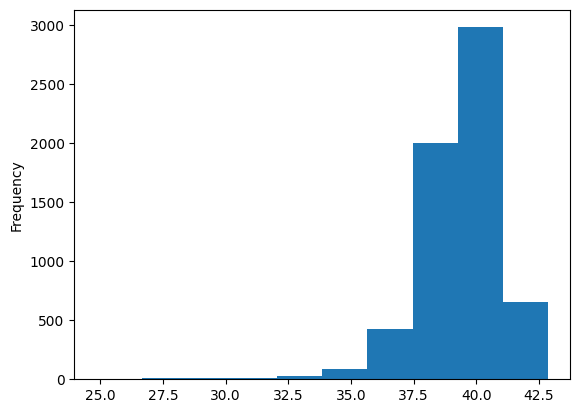

In [78]:
# encontrando outliers em outras colunas para encontrar melhor medida de tendência central para substituição
# de nulos: média, moda ou mediana
df["Gestational_Age_At_Birth"].plot.hist()

<Axes: ylabel='Frequency'>

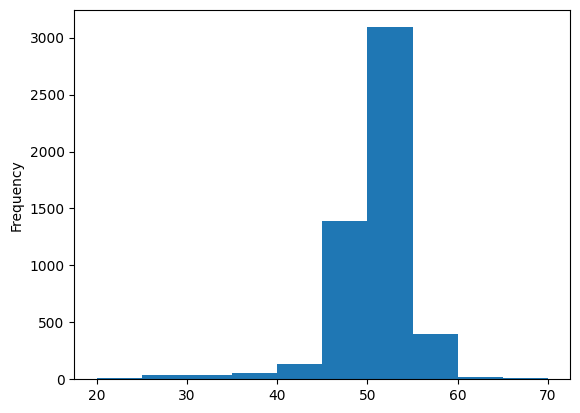

In [79]:
df["Birth_Length"].plot.hist()

<Axes: ylabel='Frequency'>

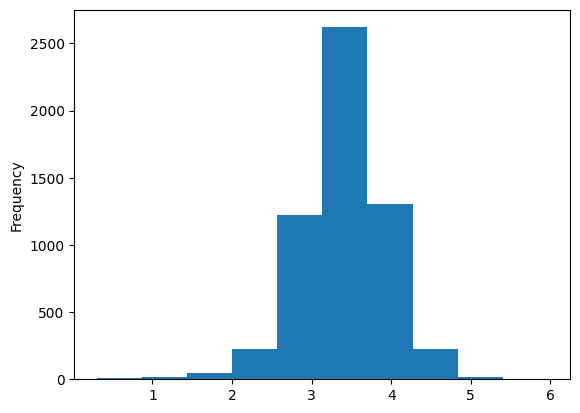

In [80]:
df["Birth_Weight"].plot.hist()

In [83]:
# substituindo nulos em Gestational_Age_At_Birth pela sua média
df["Gestational_Age_At_Birth"].fillna(df["Gestational_Age_At_Birth"].mean(), inplace=True)
df["Gestational_Age_At_Birth"].isnull().mean()*100 # 0% de valores nulos

np.float64(0.0)

In [84]:
# substituindo nulos em Birth_Length pela sua média
df["Birth_Length"].fillna(df["Birth_Length"].mean(), inplace=True)
df["Birth_Length"].isnull().mean()*100 # 0% de valores nulos

np.float64(0.0)

In [85]:
# substituindo nulos em Birth_Length pela sua média
df["Birth_Weight"].fillna(df["Birth_Weight"].mean(), inplace=True)
df["Birth_Weight"].isnull().mean()*100 # 0% de valores nulos

np.float64(0.0)

In [86]:
df.head(10)

,Maternal_Age,Household_Income,Maternal_Education,Edinburgh_Postnatal_Depression_Scale,PROMIS_Anxiety,Gestational_Age_At_Birth,Delivery_Date,Birth_Length,Birth_Weight,Threaten_Life,Threaten_Baby_Danger,Threaten_Baby_Harm,NICU_Stay_No,NICU_Stay_Unknown,NICU_Stay_Yes,Delivery_Mode_Caesarean,Delivery_Mode_Unknown,Delivery_Mode_Vaginally
0,38,9,5,9.0,13.0,39.710000,2020-12-01,49.200000,3.431000,2,3,27,1,0,0,0,0,1
1,35,9,4,4.0,17.0,39.351094,NaT,50.499156,3.410886,2,33,92,0,1,0,0,1,0
3,29,5,5,9.0,20.0,38.570000,2020-12-01,41.000000,2.534000,53,67,54,1,0,0,0,0,1
4,36,3,4,14.0,20.0,39.860000,2020-10-01,53.340000,3.714000,23,32,71,1,0,0,1,0,0
5,38,7,4,3.0,8.0,38.570000,2020-06-01,50.499156,3.410886,29,36,33,0,1,0,0,1,0
6,34,9,2,8.0,15.0,39.351094,NaT,50.499156,3.410886,24,30,32,0,1,0,0,1,0
8,33,5,3,1.0,7.0,40.860000,2020-11-01,55.880000,4.480000,27,76,72,1,0,0,0,0,1
10,29,4,1,20.0,28.0,39.351094,NaT,50.499156,3.410886,0,50,98,0,1,0,0,1,0
13,29,4,5,14.0,17.0,41.000000,2020-10-01,47.000000,3.084000,68,69,81,1,0,0,0,0,1
14,32,9,6,3.0,14.0,30.290000,2021-03-01,32.000000,1.050000,30,30,50,0,0,1,1,0,0
